<a href="https://colab.research.google.com/github/juanxo90/ML_examples/blob/main/02-pandas_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of data visualization using pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/juanxo90/ML_examples/main/data/df3')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       500 non-null    float64
 1   b       500 non-null    float64
 2   c       500 non-null    float64
 3   d       500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [ ]:
df3.head()

,a,b,c,d
0,0.336272,0.325011,0.001020,0.401402
1,0.980265,0.831835,0.772288,0.076485
2,0.480387,0.686839,0.000575,0.746758
3,0.502106,0.305142,0.768608,0.654685
4,0.856602,0.171448,0.157971,0.321231


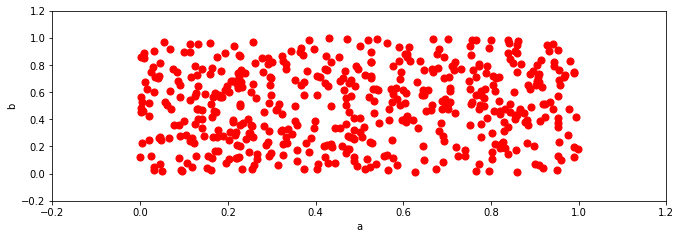

In [ ]:
# plting an scatter plot
df3.plot.scatter(x='a', y='b', 
                 c='red', s=50, 
                 xlim=(-0.2, 1.2), 
                 ylim=(-0.2, 1.2),
                 figsize=(11,3.5))

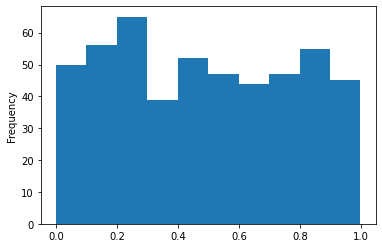

In [ ]:
# plotting an histogram of "a" property
df3['a'].plot.hist()

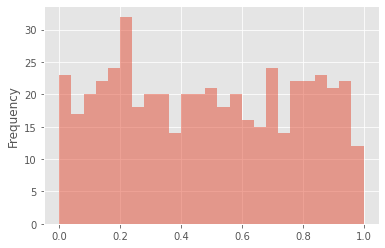

In [ ]:
# same histogram as before by setting ggplot style
plt.style.use('ggplot')
df3['a'].plot.hist(alpha=0.5,bins=25)

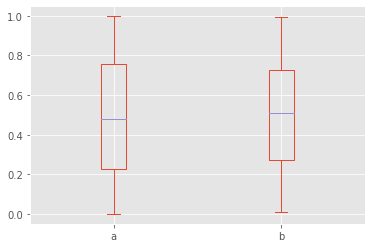

In [ ]:
# boxplot comparison between "a" and "b"
df3[["a","b"]].plot.box()

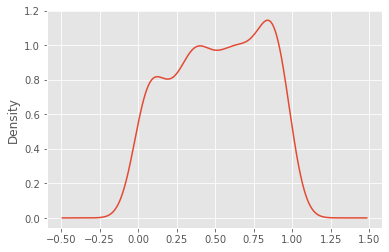

In [ ]:
# dke plot of "d"
df3.d.plot.kde()

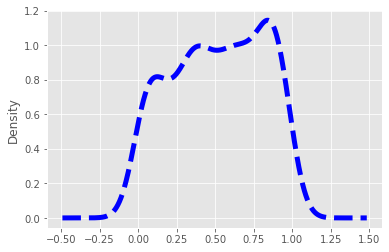

In [ ]:
# changing some styles in the past plot
df3.d.plot.kde(
    ls='--', 
    c='blue',
    linewidth=5
    )

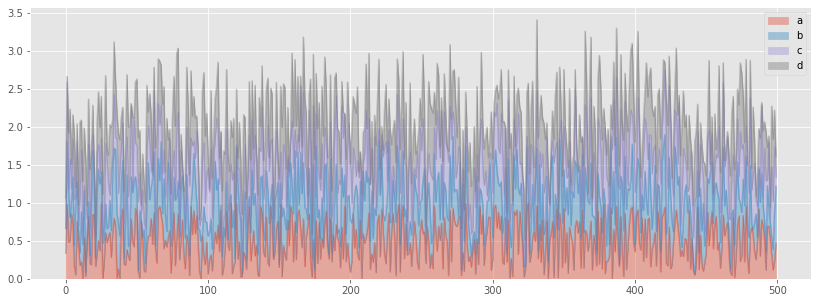

In [ ]:
# area plot
df3.plot.area(alpha=0.4, figsize=(14,5)) #alpha is the transparency

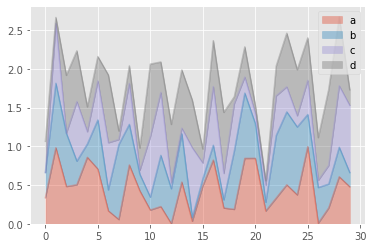

In [ ]:
# area plot of the first 30 rows
df3.iloc[0:30].plot.area(alpha=0.4)

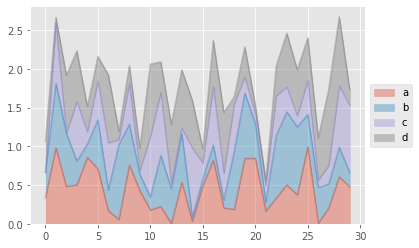

In [ ]:
# put the legend outside
f = plt.figure()
df3.iloc[0:30].plot.area(alpha=0.4,ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Examples of time series visualization using pandas...

In [ ]:
mcdon = pd.read_csv("https://raw.githubusercontent.com/juanxo90/ML_examples/main/data/mcdonalds.csv",
                    index_col="Date", parse_dates=True)

In [ ]:
mcdon.head()

,Adj. Close,Adj. Volume
Date,,
1970-01-02,0.209761,2825604.0
1970-01-05,0.213316,2210449.5
1970-01-06,0.214501,1951168.5
1970-01-07,0.213316,2728768.5
1970-01-08,0.213316,2242404.0


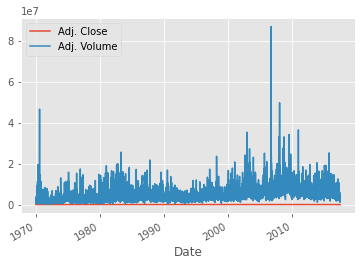

In [ ]:
# ploting
mcdon.plot()

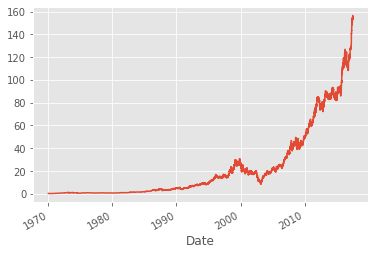

In [ ]:
# ploting one column
mcdon["Adj. Close"].plot()

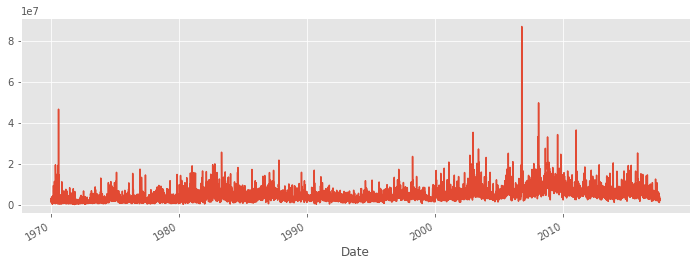

In [ ]:
mcdon["Adj. Volume"].plot(figsize=(12,4))

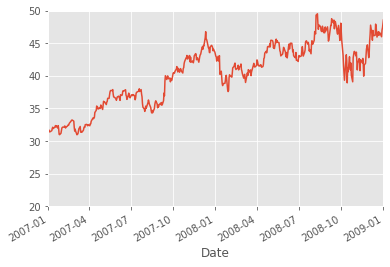

In [ ]:
# ploting an adjusted plot (note: you can plot using list or tuple)
mcdon["Adj. Close"].plot(xlim=['2007-01-01', '2009-01-01'], 
                         ylim=(20, 50))

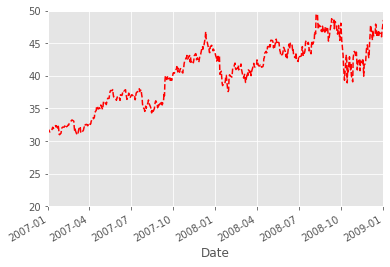

In [ ]:
# change the linestile and color
mcdon["Adj. Close"].plot(xlim=['2007-01-01', '2009-01-01'], 
                         ylim=(20, 50),
                         ls='--', c='red')

## Working with matplotlib dates

In [ ]:
import matplotlib.dates as dates

In [ ]:
# creating a date ranges 
idx =mcdon.loc['2007-01-01':'2007-05-01'].index

In [ ]:
# creating the stock data 
stock = mcdon.loc['2007-01-01':'2007-05-01']['Adj. Close']

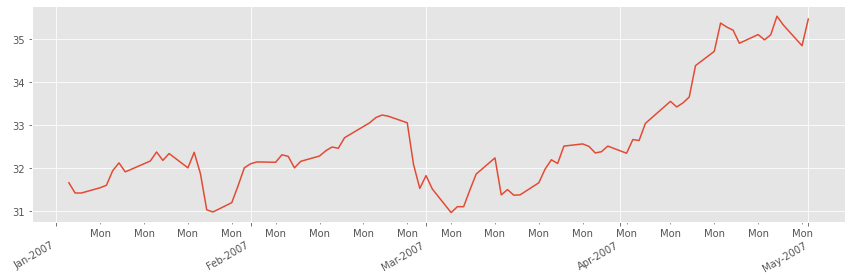

In [ ]:
# plotting
fig, ax = plt.subplots(figsize=(12,4))

# ploting by dates
ax.plot_date(idx,stock,'-')

# Locating and formating ticks by months
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%b-%Y')) #\n is new line

ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%a'))

# adding grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate()
plt.tight_layout()